# Chapter 8 - Dimensionality Reduction

Code from:

[1] https://github.com/ageron/handson-ml/

[2] Hands-on Machine Learning with Scikit-Learn and TensorFlow



## Setup

In [172]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# PCA
from sklearn.decomposition import PCA

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Generate some data to play with for PCA


In [173]:
# Create a random 3D dataset with more variance on 2 dimensions
XData = np.random.rand(3,100);
XData = np.append(XData, -1*XData, axis=1);
#XData = np.append(XData,  1*XData, axis=1);
#XData = np.append(XData,  2*np.cos(XData), axis=1);
#XData = np.append(XData, -1*XData, axis=1);
#XData[2,:] = np.random.rand(1,XData.shape[1])/2;
print(XData.shape)

(3, 200)


In [174]:
# Create PCA object
pca = PCA()
# Perform PCA on data
pca.fit(XData)
# Calculate the variance on each dimension
cumsum = np.cumsum(pca.explained_variance_ratio_)
print("Variance per dimension: ", (pca.explained_variance_ratio_))
print("Cummulative variance sum: ", cumsum)
# Calculate the number of dimensions that hold the most variance
d = np.argmax(cumsum >= 0.95) + 1
print("Number of dimensions selected: ", d)

# Perform PCA
pca = PCA(n_components=d)
XData_reduced = pca.fit_transform(XData.T)
print(XData_reduced.shape)

Variance per dimension:  [  5.27450971e-01   4.72549029e-01   4.94544255e-32]
Cummulative variance sum:  [ 0.52745097  1.          1.        ]
Number of dimensions selected:  2
(200, 2)


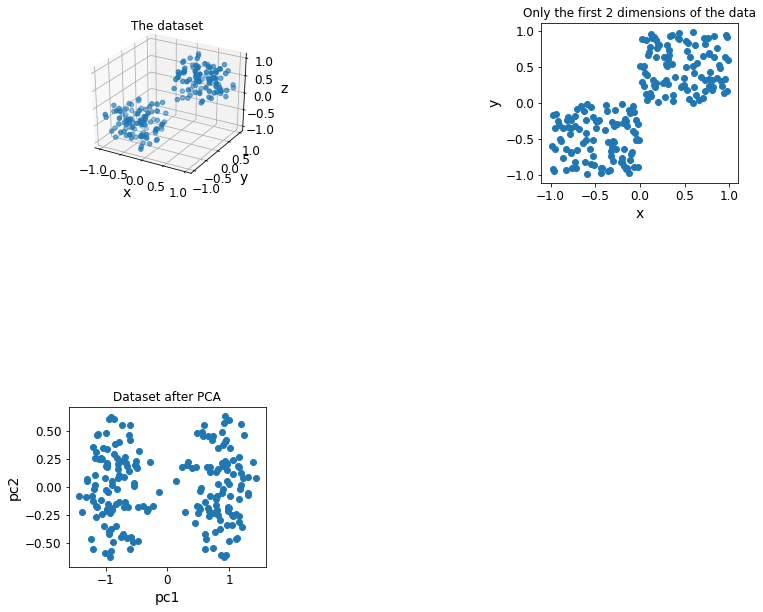

In [175]:
# Figure
fig = plt.figure(figsize=(12,10))

# Figure with subplot 1 contains data
ax1 = fig.add_subplot(331, projection='3d')
ax1.scatter(XData[0,:], XData[1,:], XData[2,:])
ax1.set_title('The dataset')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

# Figure with subplot 2 contains only the first 2 dimensions of the data
ax2 = fig.add_subplot(333)
ax2.scatter(XData[0,:], XData[1,:])
ax2.set_title('Only the first 2 dimensions of the data')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# PCA
ax3 = fig.add_subplot(337)
ax3.scatter(XData_reduced.T[0,:], XData_reduced.T[1,:])
ax3.set_title('Dataset after PCA')
ax3.set_xlabel('pc1')
ax3.set_ylabel('pc2')

plt.show()